# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *



Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test//2:], newsgroups_test.target[num_test//2:]
dev_data, dev_labels = newsgroups_test.data[:num_test//2], newsgroups_test.target[:num_test//2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [6]:
#importing warnings to supress deprecate messages
import warnings
warnings.filterwarnings('ignore')

def P1(num_examples=5):
### STUDENT START ###
    #print the first num_examples examples
    for i in range(num_examples):
        print('Label = {}'.format(newsgroups_train.target_names[train_labels[i]]))
        print(train_data[i])
        print('')

### STUDENT END ###
#questions says 5, but looks like only 2 examples will be generated
P1(2)

Label = comp.graphics
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Label = talk.religion.misc


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.



(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [19]:
def P2():
### STUDENT START ###
    cv = CountVectorizer()
    x = cv.fit_transform(train_data)
    
    print('a.')
    print('Size of vocabulary = {}'.format (len(cv.vocabulary_)))
    #total non-zeros divided by number of examples
    print('Average number of non-zero features per example = {}'.format(x.nnz/x.shape[0]))
    #total non-zeros divided by size of matrix
    print('Fraction of non-zero entries in the matrix = {}'.format(x.nnz/(x.shape[0]*x.shape[1])))
        
    print('\nb.')
    print('First feature string = {}'.format(cv.get_feature_names()[0]))
    print('Last feature string = {}'.format(cv.get_feature_names()[len(cv.vocabulary_)-1]))
    
    print('\nc.')
    cv = CountVectorizer(vocabulary=['atheism', 'graphics', 'space', 'religion'])
    x = cv.fit_transform(train_data)
    #shape looks correct with only 4 features
    print('Shape of training vectors = {}'.format(x.shape))
    print('Average number of non-zero features per example = {}'.format(x.nnz/x.shape[0]))
    
    print('\nd.')
    #set ngram_range to 2
    cv = CountVectorizer(analyzer='word', ngram_range=(2, 2))
    x = cv.fit_transform(train_data)
    print('Size of vocabulary, bigram = {}'.format(len(cv.vocabulary_)))
        
    #set ngram_range to 3
    cv = CountVectorizer(analyzer='word', ngram_range=(3, 3))
    x = cv.fit_transform(train_data)
    print('Size of vocabulary, trigram = {}'.format(len(cv.vocabulary_)))
    
    print('\ne.')
    cv = CountVectorizer(min_df=10)
    x = cv.fit_transform(train_data)
    print('Size of vocabulary (min_df 10) = {}'.format(len(cv.vocabulary_)))
    
    print('\nf.')
    #build 
    cv_train = CountVectorizer()
    cv_dev = CountVectorizer()
    cv_train.fit_transform(train_data)
    cv_dev.fit_transform(dev_data)
    
    #subtract dicts to get size of missing vocabs
    print('Words in dev vocabulary but not in train vocabulary = {}'.format
          (len(cv_dev.vocabulary_.keys() - cv_train.vocabulary_.keys())))
    #divide the missing vocabs by total dev vocab sizes
    print('Ratio of words missing = {}'.format
          (len(cv_dev.vocabulary_.keys() - cv_train.vocabulary_.keys()) / len(cv_dev.vocabulary_.keys())))

### STUDENT END ###
P2()

a.
Size of vocabulary = 26879
Average number of non-zero features per example = 96.70599803343165
Fraction of non-zero entries in the matrix = 0.0035978272269590263

b.
First feature string = 00
Last feature string = zyxel

c.
Shape of training vectors = (2034, 4)
Average number of non-zero features per example = 0.26843657817109146

d.
Size of vocabulary, bigram = 194891
Size of vocabulary, trigram = 315692

e.
Size of vocabulary (min_df 10) = 3064

f.
Words in dev vocabulary but not in train vocabulary = 4027
Ratio of words missing = 0.24787640034470024


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [23]:
def P3():
### STUDENT START ###
    #convert data
    cv = CountVectorizer()
    train_x = cv.fit_transform(train_data)
    dev_x = cv.transform(dev_data)
    
    #gridsearchcv for n_neighbors
    model_knn = KNeighborsClassifier()
    neighbors = {'n_neighbors':[1, 3, 5, 7, 10, 20, 50, 100, 150, 200, 250]}
    clf = GridSearchCV(model_knn, neighbors, scoring='f1')
    clf.fit(train_x, train_labels)
    
    #use the best_params_ produced by gridsearch
    model_knn = KNeighborsClassifier(clf.best_params_['n_neighbors'])
    model_knn.fit(train_x, train_labels)
    knn_predict = model_knn.predict(dev_x)
    print('KNN({}) F1 score = {}'.format(model_knn.n_neighbors, metrics.f1_score(dev_labels, knn_predict, average='weighted')))
    
    #gridsearchcv for alpha
    model_nb = MultinomialNB()
    alphas = {'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    clf = GridSearchCV(model_nb, alphas, scoring='f1')
    clf.fit(train_x, train_labels)
    
    #use the best_params_ produced by gridsearch
    model_nb = MultinomialNB(alpha=clf.best_params_['alpha'])
    model_nb.fit(train_x, train_labels)
    nb_predict = model_nb.predict(dev_x)
    print('NB F1 score(alpha = {}) = {}'.format(model_nb.alpha, metrics.f1_score(dev_labels, nb_predict, average='weighted')))
    
    #gridsearchcv for C value
    model_log = LogisticRegression(penalty='l2')
    c_value = {'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100, 500]}
    clf = GridSearchCV(model_log, c_value, scoring='f1')
    clf.fit(train_x, train_labels)
    
    #use the best_params_ produced by gridsearch
    model_log = LogisticRegression(penalty='l2', C=clf.best_params_['C'])
    model_log.fit(train_x, train_labels)
    log_predict = model_log.predict(dev_x)
    print('log F1 score(C = {}) = {}'.format(model_log.C, metrics.f1_score(dev_labels, log_predict, average='weighted')))
    
    #now loop through C values to compute sum of squared weight values
    c_value = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100, 500]
    for c in c_value:
        model_log = LogisticRegression(penalty='l2', C=c)
        model_log.fit(train_x, train_labels)
        print('C = {}; sum squared coef_ = {}'.format(c, np.sum(np.square(model_log.coef_))))

### STUDENT END ###
P3()

KNN(50) F1 score = 0.4176318433511905
NB F1 score(alpha = 0.01) = 0.7751663218544357
log F1 score(C = 0.5) = 0.7084739776490449
C = 0.0001; sum squared coef_ = 0.03818086191683044
C = 0.001; sum squared coef_ = 0.733959920495078
C = 0.01; sum squared coef_ = 10.593741002543064
C = 0.1; sum squared coef_ = 102.27165964492782
C = 0.5; sum squared coef_ = 373.6657353237423
C = 1.0; sum squared coef_ = 601.5554912719426
C = 2.0; sum squared coef_ = 921.9203447317324
C = 10.0; sum squared coef_ = 2106.6010239076368
C = 100; sum squared coef_ = 5108.452671227223
C = 500; sum squared coef_ = 8232.769739806943


ANSWER: 

a. KNN works well when the data are clustered and look similar to one another (e.g. digit classification). This is not the case in text classification; most posts will look vastly different from one another, and comparing vocabulary count between posts make very little sense. It is not clear what "distance" means in this setting.

b. NaiveBayes is known to work well for text classification. Without a massive corpus, this space tends to be sparse. As a result, the smoothing in NB will help with performance. If the size of training data increases, reducing unknown vocabularies in dev data, logistics regression may see more improvement.

c. L2 regularization will make the matrix more dense (i.e. more non-zero variables). Since the number of features is very large, a strong L2 regularization (small C value) will distribute weights between all features and result in a small squared sum. On the other hand, a large C value will leave more zero variables, and non-zero variables will have larger values.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [26]:
def P4():
### STUDENT START ###
    #train the model
    cv = CountVectorizer()
    train_x = cv.fit_transform(train_data)
    dev_x = cv.transform(dev_data)
    
    lr = LogisticRegression(penalty='l2', C=0.5)
    lr.fit(train_x, train_labels)
    
    #sort coef to find largest coefficients for each class
    x = np.zeros((4,5))
    for i in range(lr.coef_.shape[0]):
        x[i,:] = lr.coef_[i,:].argsort()[-5:][::-1]

    x = x.flatten()
    
    #print the feature and weight for each class
    vocabk = list(cv.vocabulary_.keys())
    vocabv = list(cv.vocabulary_.values())

    print('ONE-WORD-Feature:\n\t\t', end='')
    for c in newsgroups_train.target_names:
        print ('\t{}'.format(c), end='')
    print('')
    for k in x:
        print('{:20}'.format(vocabk[vocabv.index(k)]), end='')
        for i in range(len(categories)):
            print ('\t{:.8}'.format(lr.coef_[i][k]), end='')
        print('')
        
    #train the model
    cv = CountVectorizer(analyzer='word', ngram_range=(2,2))
    train_x = cv.fit_transform(train_data)
    dev_x = cv.transform(dev_data)
    
    lr = LogisticRegression(penalty='l2', C=0.5)
    lr.fit(train_x, train_labels)
    
    #sort coef to find largest coefficients for each class
    x = np.zeros((4,5))
    for i in range(lr.coef_.shape[0]):
        x[i,:] = lr.coef_[i,:].argsort()[-5:][::-1]
    
    x = x.flatten()
    
    #print the feature and weight for each class
    vocabk = list(cv.vocabulary_.keys())
    vocabv = list(cv.vocabulary_.values())

    print('\nBIGRAM-FEATURE:\n\t\t', end='')
    for c in newsgroups_train.target_names:
        print ('\t{}'.format(c), end='')
    print('')
    for k in x:
        print('{:20}'.format(vocabk[vocabv.index(k)]), end='')
        for i in range(len(categories)):
            print ('\t{:.8}'.format(lr.coef_[i][k]), end='')
        print('')
### STUDENT END ###
P4()

ONE-WORD-Feature:
			alt.atheism	comp.graphics	sci.space	talk.religion.misc
atheists            	0.83438941	-0.093423933	-0.26711983	-0.63743334
bobby               	0.82352765	-0.19130439	-0.28666256	-0.38724656
religion            	0.79841718	-0.50818821	-0.65874823	-0.050530285
atheism             	0.79482578	-0.35104578	-0.36724099	-0.37698818
deletion            	0.72378169	-0.24932734	-0.27265051	-0.27041859
graphics            	-0.6408689	1.6258388	-1.1030214	-0.62627714
image               	-0.46957764	1.1169102	-0.67193105	-0.3808019
file                	-0.27528736	1.0597553	-0.68270934	-0.50611713
3d                  	-0.30344975	0.94180895	-0.5709698	-0.31753986
computer            	0.07148505	0.84439441	-0.56937751	-0.39616182
space               	-1.0613557	-1.116088	1.8643074	-0.97199072
orbit               	-0.35029264	-0.5593761	1.0127987	-0.49887549
nasa                	-0.46547435	-0.41010281	0.85146208	-0.40153511
launch              	-0.37767644	-0.39671888	0.78386

ANSWER: The bigram table is a bit surprising. Many of the features do not look immediately related to the specific classes; instead, they are more 'common phrases'. This suggests that bigram features may not capture the essence of the posts well. It does make some sense the features turn out this way. Common sentence structures (are you, it was, etc.) should appear more often than other combinations. Lastly, Kent appears to be very active in religion-related discussions, as 'cheers kent' appear in both alt.atheism and talk.religion.misc classes.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [27]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    #convert to lower case
    s = s.lower()
    
    #start with apostrophe special case
    #change 've into have
    s = re.sub("'ve", ' have', s)
    #change 're into are
    s = re.sub("'re", ' are', s)
    #change 'll into will
    s = re.sub("'ll", ' will', s)
    #change 'm into am
    s = re.sub("'m", ' am', s)
    #change 'd 
    s = re.sub("'d", 'd', s)
    #change 's into s
    s = re.sub("'s", 's', s)
    #change n't 
    #s = re.sub("n't", 'nt', s)
    
    #remove remaining special characters (everything non-alpha, non-numeric)
    s = ' ' + re.sub('(\W)+',' ', s) + ' '
 
    #handle some special cases for nouns
    s = re.sub(r'(\w{4}\w*)ness\s', r'\1 ', s)
    #s = re.sub('ment$', '', s)
    
    #change ionally into ion
    #s = re.sub(r'(\w*ion)ally\s', r'\1 ', s)
    #remove ing
    #s = re.sub(r'(\w{4}\w*)ing\s',r'\1 ', s)
    
    #remove ly to address adverbs
    s = re.sub(r'(\w{4}\w*)ly\s',r'\1 ', s)
    
    #change tion into te
    #s = re.sub(r'(\w+)tion\s', r'\1t ', s)
    #change sion into se
    #s = re.sub('sion$', 'se', s)
    
    #try to tackle plural cases
    s = re.sub(r'(\w+ch)es\s', r'\1 ', s)
    s = re.sub('(\w{3}\w+)ies\s', r'\1y ', s)
    s = re.sub(r'(\w+sh)es\s', r'\1 ', s)
    s = re.sub(r'(\w+ss)es\s', r'\1 ', s)
    #s = re.sub(r'(\w{2}\w*[a-rt-z])s\s', r'\1 ', s)
    
    #remove ed to address some past tenses
    #s = re.sub('(\w){6}ed$',sub2, s)
    
    #cap words at length 9
    s = re.sub(r'(\w{9})\w+',r'\1', s)
    
    #remove prepositions
    s = re.sub(r'\sin\s', ' ', s)
    s = re.sub(r'\son\s', ' ', s)
    s = re.sub(r'\sat\s', ' ', s)
    s = re.sub(r'\sas\s', ' ', s)
    s = re.sub(r'\sof\s', ' ', s)
    s = re.sub(r'\soff\s', ' ', s)
    s = re.sub(r'\sto\s', ' ', s)
    s = re.sub(r'\sby\s', ' ', s)
    s = re.sub(r'\sfor\s', ' ', s)
    s = re.sub(r'\sup\s', ' ', s)
    s = re.sub(r'\sdown\s', ' ', s)
    #s = re.sub(r'\sinto\s', ' ', s)
    #s = re.sub(r'\sfrom\s', ' ', s)
    s = re.sub(r'\swith\s', ' ', s)
    
    #remove articles
    s = re.sub(r'\sa\s', ' ', s)
    s = re.sub(r'\san\s', ' ', s)
    s = re.sub(r'\sthe\s', ' ', s)
    
    #remove conjuctions
    s = re.sub(r'\sor\s', ' ', s)
    s = re.sub(r'\snor\s', ' ', s)
    s = re.sub(r'\sand\s', ' ', s)
    s = re.sub(r'\sbut\s', ' ', s)
    
    #address verb to be
    #s = re.sub(r'\sare\s', ' be ', s)
    #s = re.sub(r'\swere\s', ' be ', s)
    #s = re.sub(r'\sis\s', ' be ', s)
    #s = re.sub(r'\sam\s', ' be ', s)
    #s = re.sub(r'\swas\s', ' be ', s)
    #s = re.sub(r'\sbe\s', ' ', s)
    
    #replace all digits with single '0'
    s = re.sub(r'\d+', '0', s)
    return s
### STUDENT END ###

def P5():
### STUDENT START ###
    #start with the empty preprocessor for comparison
    cv = CountVectorizer(preprocessor=empty_preprocessor)
    train_x = cv.fit_transform(train_data)
    dev_x = cv.transform(dev_data)
    
    lr = LogisticRegression(penalty='l2', C=0.5)
    lr.fit(train_x, train_labels)
    
    log_predict = lr.predict(dev_x)
    print('dicitonary size = {}'.format(len(cv.vocabulary_)))
    print('baseline F1 score = {}'.format(metrics.f1_score(dev_labels, log_predict, average='weighted')))
    
    #now use the better preprocessor
    cv = CountVectorizer(preprocessor=better_preprocessor)
    train_x = cv.fit_transform(train_data)
    dev_x = cv.transform(dev_data)
    
    lr = LogisticRegression(penalty='l2', C=0.5)
    lr.fit(train_x, train_labels)
    
    log_predict = lr.predict(dev_x)
    print('dicitonary size = {}'.format(len(cv.vocabulary_)))
    print('new F1 score = {}'.format(metrics.f1_score(dev_labels, log_predict, average='weighted')))
    
### STUDENT END ###
P5()

dicitonary size = 33291
baseline F1 score = 0.7069109185493502
dicitonary size = 22966
new F1 score = 0.7286072343490041


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

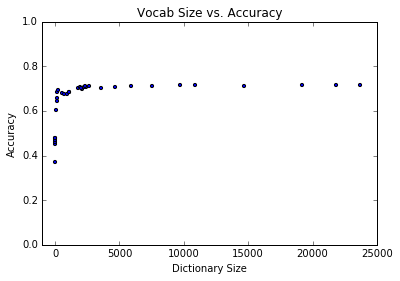

In [28]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    #construct a range of c value for L1 regularization
    c_value=[]
    c_value += list(np.arange(0.001, 0.01, 0.002))
    c_value += list(np.arange(0.01, 0.1, 0.02))
    c_value += list(np.arange(0.1, 1, 0.2))
    c_value += list(np.arange(1, 10, 1))
    c_value += [20, 30, 50, 100, 150, 200, 300, 500, 750, 1000]
    
    #variables used for plot later
    d_size, acc=[],[]
    
    #start with a CountVectorizer to work on L1 regularization
    for c in c_value:
        
        #training with l1 regularization
        cv = CountVectorizer()
        train_x = cv.fit_transform(train_data)
        dev_x = cv.transform(dev_data)

        lr = LogisticRegression(penalty='l1', C=c, tol=0.01)
        lr.fit(train_x, train_labels)
        
        #obtain features that do not have 0 weight for all classes
        x = np.sum(np.absolute(lr.coef_), axis=0)
        x = np.nonzero(x)[0]
        
        #this is also the vocabulary size
        d_size.append(len(x))

        #extract the corresponding vocabularies
        l1dict = []
        for k,v in cv.vocabulary_.items():
            if v in x:
                l1dict.append(k)
        
        #now use the vocabularies to run l2 regularization
        cv = CountVectorizer(vocabulary=l1dict)
        train_x = cv.fit_transform(train_data)
        dev_x = cv.transform(dev_data)        

        #gridsearchcv commented out due to long run time; c = 0.5 is used instead
        #c2_value = {'C': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 2.0, 10.0]}
        #lr2 = LogisticRegression(penalty='l2')
        #clf = GridSearchCV(lr2, c2_value, scoring='f1')
        #clf.fit(train_x, train_labels)
        #lr2 = LogisticRegression(penalty='l2', C=clf.best_params_['C'])
        
        lr2 = LogisticRegression(penalty='l2', C=0.5)
        lr2.fit(train_x, train_labels)

        #record the accuracy
        acc.append(lr2.score(dev_x, dev_labels))


    #plot the scatter plot
    plt.scatter(d_size, acc, label="Samples", s=10)

    plt.xlabel("Dictionary Size")
    plt.ylabel("Accuracy")

    plt.xlim((-1000, 25000))
    plt.ylim((0, 1))
    plt.title("Vocab Size vs. Accuracy")
    plt.show()
    
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [42]:
def P7():
    ### STUDENT START ###
    #use tfidvectorizer to train a logistic regression model
    tv = TfidfVectorizer()
    train_x = tv.fit_transform(train_data)
    dev_x = tv.transform(dev_data)
    
    lr = LogisticRegression(penalty='l2', C=100)
    lr.fit(train_x, train_labels)
    
    log_predict = lr.predict(dev_x)

    #get predicted probability to compute R
    predict_p = lr.predict_proba(dev_x)
    
    #get max predicted probability for each example
    mpp = np.amax(predict_p, 1)
    
    #get the predicted probaility of correct label for each example
    ppc = np.zeros(predict_p.shape[0])
    for i in range(dev_labels.shape[0]):
        ppc[i] = predict_p[i, dev_labels[i]]
        
    #compute R value
    r_value = mpp/ppc
    
    #get top 3 values and print out the examples
    max3 = r_value.argsort()[-3:][::-1]
    for i in max3:
        print('R = {}'.format(r_value[i]))
        print('Actual Category = {}'.format(newsgroups_train.target_names[dev_labels[i]]))
        print('Classified as = {}'.format(newsgroups_train.target_names[log_predict[i]]))
        print(dev_data[i])
        print('')
    
    ### STUDENT END ###
P7()

R = 929.3572778613404
Actual Category = talk.religion.misc
Classified as = comp.graphics
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of 

ANSWER: TfidfVectorizer computes idf (inverse document frequency). This value takes into consideration the frequency of a word in the corpus, so words that are extremely common throughout all documents will have less weight. The model will then focus more on words that have real impact.  
Looking at the confusion matrix and error examples, there are a few observations:  
1. The most confused categories are alt.atheism and talk.religion.misc. This makes sense because both topics relate to religion.  
2. The model also gets confused when people discuss technical terms (printer, printing, ftp, etc.), mistaking the document as comp.graphics class.

Based on these observations, the following ideas may improve the model:  
1. Increase the weight of words related to religion, so they stand out more and offset common technical terms. For example, a document containing 'Mormon' would almost always be about religion.
2. In Tfidf, it is not as important to remove stop words, but preprocessing the document to address word variations should still help.  
3. It may be worthwhile to go through the list of top weighted words to see if something odd shows up.
4. It may help to create specific tokens that help distinguish alt.atheism from talk.religion.misc (e.g. 'no god').

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

In [176]:
#preprocessor might help
def better_preprocessor(s):
    #convert to lower case
    s = s.lower()
    
    #start with apostrophe special case
    #change 've into have
    s = re.sub("'ve", ' have', s)
    #change 're into are
    s = re.sub("'re", ' are', s)
    #change 'll into will
    s = re.sub("'ll", ' will', s)
    #change 'm into am
    s = re.sub("'m", ' am', s)
    #change 'd 
    s = re.sub("'d", ' had', s)
    #change 's into s
    s = re.sub("'s", ' is', s)
    
    #change n't 
    #s = re.sub("won't", ' will not', s)
    #s = re.sub("can't", ' cannot', s)
    #s = re.sub("ain't", 'am not', s)
    #s = re.sub("n't", ' not', s)
            
    #remove email addresses
    s = re.sub(r'\S+@\S+', r' ', s)
    
    #identify terms that may be 'anti-god'
    #s = re.sub(r'"god"', r'antigod', s)
    #s = re.sub(r'jesus christ', 'antigod', s)  
    
    #tokenize some bible terms
    s = re.sub(r'deceitful tongue', r'bibleterm', s)
    s = re.sub(r'peace be with you', r'bibleterm', s)
    s = re.sub(r'in god i trust', r'bibleterm', s) 
  
    #process group names
    s = re.sub(r'sci.space', r'scispace', s)
    s = re.sub(r'alt.atheism', r'atheism', s)
    s = re.sub(r'talk.religion.misc', r'talkreligion', s)
    #s = re.sub(r'comp.graphics', r'graphics', s)

    #remove remaining special characters (everything non-alpha, non-numeric)
    s = ' ' + re.sub('(\W)+',' ', s) + ' '
 
    #expand some abbreviations
    s = re.sub(r'\stdrs\s', ' tracking and data relay satellite ', s)    
    s = re.sub(r'\sjpl\s', ' Jet Propulsion Laboratory ', s)
    s = re.sub(r'\snasa\s', ' National Aeronautics and Space Administration ', s)
    s = re.sub(r'\smsfc\s', ' marshall space flight center ', s)
    s = re.sub(r'\siggraph\s', ' special interest group on graphics and interactive techniques ', s)
    #s = re.sub(r'\sssme\s', ' space shuttle main engine ', s)
       
    #typo correction
    s = re.sub(r'intelegent', 'intelligent', s)    
      
    
    #adobe softwares
    #s = re.sub(r'\sphotoshop\s', r'adobe', s)
    #s = re.sub(r'\sillustrator\s', r'adobe', s)
   
    #change ionally into ion
    #s = re.sub(r'(\w*ion)ally\s', r'\1 ', s)
    #remove ing
    #s = re.sub(r'(\w{4}\w*)ing\s',r'\1 ', s)
    
    #remove ly to address adverbs
    s = re.sub(r'(\w{4}\w*)ly\s',r'\1 ', s)
    
    #change tion into te
    #s = re.sub(r'(\w+)tion\s', r'\1t ', s)
    #change sion into se
    #s = re.sub('sion$', 'se', s)
    
    #try to tackle plural cases
    s = re.sub(r'(\w+ch)es\s', r'\1 ', s)
    s = re.sub('(\w{3}\w+)ies\s', r'\1y ', s)
    s = re.sub(r'(\w+sh)es\s', r'\1 ', s)
    s = re.sub(r'(\w+ss)es\s', r'\1 ', s)
    s = re.sub(r'(\w{2}\w*[a-rt-z])s\s', r'\1 ', s)

    #handle some special cases for nouns
    #s = re.sub(r'(\w{4}\w*)ness\s', r'\1 ', s)
    #s = re.sub('ment$', '', s)
    
    #remove ed to address some past tenses
    #s = re.sub('(\w){6}ed$',sub2, s)
    
    #cap words at length 9
    s = re.sub(r'(\w{9})\w+',r'\1', s)
    
    #remove prepositions
    #s = re.sub(r'\sin\s', ' ', s)
    #s = re.sub(r'\son\s', ' ', s)
    #s = re.sub(r'\sat\s', ' ', s)
    #s = re.sub(r'\sas\s', ' ', s)
    #s = re.sub(r'\sof\s', ' ', s)
    #s = re.sub(r'\soff\s', ' ', s)
    #s = re.sub(r'\sto\s', ' ', s)
    #s = re.sub(r'\sby\s', ' ', s)
    #s = re.sub(r'\sfor\s', ' ', s)
    #s = re.sub(r'\sup\s', ' ', s)
    #s = re.sub(r'\sdown\s', ' ', s)
    #s = re.sub(r'\sinto\s', ' ', s)
    #s = re.sub(r'\sfrom\s', ' ', s)
    #s = re.sub(r'\swith\s', ' ', s)
    
    #remove articles
    #s = re.sub(r'\sa\s', ' ', s)
    #s = re.sub(r'\san\s', ' ', s)
    #s = re.sub(r'\sthe\s', ' ', s)
    
    #remove conjuctions
    #s = re.sub(r'\sor\s', ' ', s)
    #s = re.sub(r'\snor\s', ' ', s)
    #s = re.sub(r'\sand\s', ' ', s)
    #s = re.sub(r'\sbut\s', ' ', s)
    
    #address verb to be
    s = re.sub(r'\sare\s', ' be ', s)
    s = re.sub(r'\swere\s', ' be ', s)
    s = re.sub(r'\sis\s', ' be ', s)
    s = re.sub(r'\sam\s', ' be ', s)
    s = re.sub(r'\swas\s', ' be ', s)
        
    #replace all digits with single '0'
    s = re.sub(r'\d+', '0', s)
           
    return s
    
def P8():
    
    #this is baseline
    tv = TfidfVectorizer()
    train_x = tv.fit_transform(train_data)
    dev_x = tv.transform(dev_data)
    
    lr = LogisticRegression(penalty='l2', C=100)
    lr.fit(train_x, train_labels)
    
    log_predict = lr.predict(dev_x)
    cm = confusion_matrix(dev_labels, log_predict)
           
    #print baseline accuracy and confusion matrix for analysis
    print('Baseline accuracy = {}'.format(lr.score(dev_x, dev_labels)))
    #print (cm)
    
    
    #start modifying the model, the focus will be examples with small R value, as they can be corrected more easily
    
    tv = TfidfVectorizer(preprocessor = better_preprocessor)
    train_x = tv.fit_transform(train_data)
    dev_x = tv.transform(dev_data)
    
    #examine idf values; they range from 1 to 8
    #x = tv.idf_.argsort()[-10:]
    #for i in x:
    #     print(tv.idf_[i])
    
    #uses preprocessor to handle cases with apostrophe
    
    #spotted a few empty messages; they are classified as comp.graphics.
    #can't do much about those, and dealing with empty messages isn't too meaningful
    
    #found 'TDRS' which is abbreviation for satellites, will expand the term
    #also expanded JPL and NASA, MSFC, SIGGRAPH
    
    #adjusting weight doesn't seem to do much, not used in the end
    #look for the weight of 'quran', increase from 6 to 50
    #tv.idf_[tv.vocabulary_['quran']] = 50
    #look for the weight of 'muslim', incrase from 5.5 to 50
    #tv.idf_[tv.vocabulary_['muslim']] = 50
    #look for the weight of 'god', incrase from 3 to 50
    #tv.idf_[tv.vocabulary_['god']] = 50
    #look for the weight of 'mormon', increase from 5 to 10
    #tv.idf_[tv.vocabulary_['mormon']] = 10
    
    #try removing email addresses (text string with '@') using preprocessor
    
    #go back to preprocessor to address plural cases
    
    #god with quotes are probably indication of atheism, worth creating a token for it
    #will address this in preprocessor (as 'antigod')
    #not enough cases to tokenize, not used
    
    #spotted mentioning of 'deceitful tongue', which sounds like reference to bible
    #will combine the term as a token
    #'peace be with you' also sounds like a bible term
    #'in god I trust'
    
    #try to combine adobe softwares into one token
    #photoshop, illustrator into adobe
    #that did not work well, so code will be commented out for now
    
    #correct typo: intelegent to intelligent
    
    
    #print(tv.idf_[tv.vocabulary_['interstel']])
    
    #re-transform the data after adjusting weights
    #train_x = tv.transform(train_data)
    #dev_x = tv.transform(dev_data)
    
    lr = LogisticRegression(penalty='l2', C=100)
    lr.fit(train_x, train_labels)
    
    log_predict = lr.predict(dev_x)
    cm = confusion_matrix(dev_labels, log_predict)
    print('New accuracy = {}'.format(lr.score(dev_x, dev_labels)))
    #print (cm)
    

    #in conclusion, a few things worked (and should generalize well)
    #1. expand common abbreviations
    #2. correct typos
    #3. common text preprocessing, apostrophe cases, plurals, etc.
    #4. tokenize bible references
    #5. limit word length
        
    
    ##########this section is used to examine the examples################
 
    #log_predict = lr.predict(dev_x)

    #get predicted probability to compute R
    #predict_p = lr.predict_proba(dev_x)
    
    #get max predicted probability for each example
    #mpp = np.amax(predict_p, 1)
    
    #get the predicted probaility of correct label for each example
    #ppc = np.zeros(predict_p.shape[0])
    #for i in range(dev_labels.shape[0]):
    #    ppc[i] = predict_p[i, dev_labels[i]]
        
    #compute R value
    
    #r_value = mpp/ppc
    
    #cor = np.sum(dev_labels==log_predict)
    #max3 = r_value.argsort()[(cor+10):(cor+20)]
    
    #for i in max3:
    #    print('R = {}'.format(r_value[i]))
    #    print('Actual Category = {}'.format(newsgroups_train.target_names[dev_labels[i]]))
    #    print('Classified as = {}'.format(newsgroups_train.target_names[log_predict[i]]))
    #    print(dev_data[i])
    #    print('')

    
P8()

Baseline accuracy = 0.7633136094674556
New accuracy = 0.7825443786982249
